# Project Data Wrangling - Pacmann

Created by Rahman Aziz Firmansyah (AI/ML Engineering SU)

## 1. Project Objectives
[isi target yang ingin dicapai dalam proyek ini]

Data yang mungkin diperlukan:
- olist_order_items_dataset
    - kolom: product_id, seller_id, shipping_limit_date, price, freight_value
- olist_products_dataset
    - kolom[index]: product_id, product_category_name, product_description_length, product_photos_qty
- olist_order_reviews_dataset
    - kolom: order_id, review_score
- olist_order_payments
    - kolom: order_id, payment_sequential, payment_type, payment_installments, payment_value

Objectives:
1. Perusahaan ingin mengetahui produk apa yang paling banyak dibeli pelanggan
2. Total penjualan 5 produk yang paling banyak dibeli pelanggan
3. Mengidentifikasi 5 Produk yang mendapat review paling baik dari pelanggan
4. Mengidentifikasi korelasi antara durasi pengiriman dengan customer review score

## 2. Accessing Database
[akses database dan satukan tabel-tabel yang diperlukan dalam 1 file]

In [57]:
# import library required
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
def store_df(table_name: str, dbname: str = 'olist.db'):
    '''
    converting table queried from database into dataframe
    params:
        table_name <str>: name of table extracted from database <str>\n
        dbname <str> (database's name)\n
    return: dataframe
    '''
    con = sqlite3.connect(dbname)
    cr = con.cursor()
    query = '''SELECT * FROM ''' + table_name
    cr.execute(query)

    res = cr.fetchall()
    cols = [col[0] for col in cr.description]

    return pd.DataFrame(res, columns = cols).drop('index', axis=1)

In [59]:
df_order_items = store_df('olist_order_items_dataset')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [60]:
df_products = store_df('olist_products_dataset')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [61]:
df_order_rev = store_df('olist_order_reviews_dataset')
df_order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [62]:
df_order_pyms = store_df('olist_order_payments_dataset')
df_order_pyms.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [63]:
df_category = store_df('product_category_name_translation')
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [64]:
df_orders = store_df('olist_order_dataset')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 3. Data Exploration and Preprocessing
[lakukan proses-proses seperti data wrangling, data cleaning, data manipulation]

In [65]:
# merge data order dengan data product
df = df_order_items.merge(
                    df_products, 
                    how='left',
                    on='product_id'
                    )

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [66]:
# merge data sebelumnya dengan category name in english
df = df.merge(
    df_category,
    how='left',
    on='product_category_name'
)

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [67]:
# merge dengan order review
df = df.merge(
    df_order_rev,
    how='left',
    on='order_id'
    )

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [68]:
# merge df dengan order payments
df = df.merge(
    df_order_pyms,
    how='left',
    on='order_id'
)

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04


In [69]:
# merge df dengan order
df = df.merge(
    df_orders,
    how='left',
    on='order_id'
)

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


untuk analisis lanjutan, kita copy dulu dataframe ke dalam variable baru untuk berjaga-jaga kalau data frame hasil merge yang belum dimodifikasi masih diperlukan.

In [70]:
df_origin = df.copy()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116601 non-null  object 
 8   product_name_lenght            116601 non-null  float64
 9   product_description_lenght     116601 non-null  float64
 10  product_photos_qty             116601 non-null  float64
 11  product_weight_g               118290 non-null  float64
 12  product_length_cm             

kita ingin tahu produk apa yang paling banyak dibeli oleh pelanggan maka kita hanya perlu data ```product_id``` dan ```product_category_name_english```

In [72]:
df_most_ordered = df[['product_id', 'product_category_name_english']]
df_most_ordered.head()

,product_id,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor
3,7634da152a4610f1595efa32f14722fc,perfumery
4,ac6c3623068f30de03045865e4e10089,garden_tools


## 4. Analysis
[gali informasi dan analisis dampaknya terhadap bisnis]

In [73]:
# 5 kategori produk paling banyak dibeli
most_ordered_cat = df_most_ordered\
    ['product_category_name_english']\
    .value_counts(normalize=True)\
    .reset_index()[:5]
most_ordered_cat['product_category_name_english'] = most_ordered_cat['product_category_name_english'] * 100
most_ordered_cat.columns = ['Category', 'Percentage']

most_ordered_cat

,Category,Percentage
0,bed_bath_table,10.283420
1,health_beauty,8.605545
2,sports_leisure,7.723717
3,furniture_decor,7.576173
4,computers_accessories,6.991147


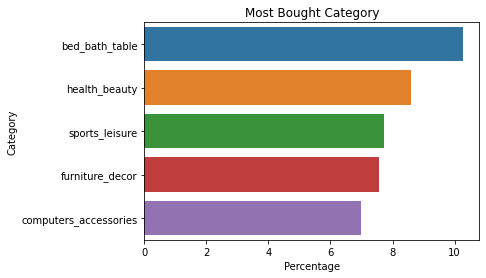

In [74]:
sns.barplot(
    data = most_ordered_cat,
    y = 'Category',
    x = 'Percentage'
)
plt.ylabel('Category')
plt.xlabel('Percentage')
plt.title('Most Bought Category')
plt.show()

Peringkat kategori produk yang banyak dibeli:
1. Perabot kasur, kamar mandi, dan meja
2. Kesehatan dan kecantikan
3. Olahraga dan rekreasi
4. Furnitur dan dekorasi
5. Aksesoris komputer

In [75]:
# 5 produk yang paling banyak mendapatkan review baik dari pelanggan
df_rev_score = df[[
    'product_category_name_english', 
    'review_score'
    ]]

mari kita bandingkan review score terbaik dengan review score barang yang paling banyak dibeli.

In [76]:
most_ordered_cat['Category']

0           bed_bath_table
1            health_beauty
2           sports_leisure
3          furniture_decor
4    computers_accessories
Name: Category, dtype: object

In [77]:
most_bought = df_rev_score\
    .groupby(['product_category_name_english'])\
    .mean()\
    .loc[most_ordered_cat['Category'], :]\
    .sort_values(by='review_score', ascending=False)\
    .reset_index()

most_bought

,product_category_name_english,review_score
0,health_beauty,4.137026
1,sports_leisure,4.107470
2,computers_accessories,3.936089
3,furniture_decor,3.912158
4,bed_bath_table,3.890605


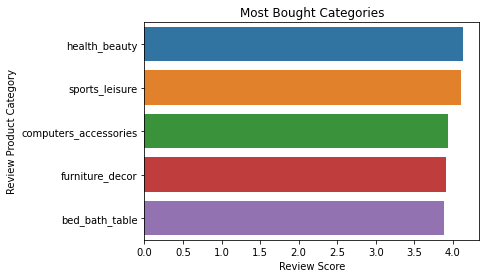

In [78]:
fig, ax = plt.subplots(1, 1, 
# figsize = (7,6)
)
sns.barplot(
    x = 'review_score',
    y = 'product_category_name_english',
    data = most_bought,
    ax = ax
)
ax.set_xlabel('Review Score')
ax.set_ylabel('Review Product Category')
ax.set_title('Most Bought Categories')
plt.show()

In [79]:
# 5 produk yang paling banyak mendapatkan review baik dari pelanggan
df_rev_score = df[[
    'product_category_name_english', 
    'review_score'
    ]]

best_rev = df_rev_score\
    .groupby(['product_category_name_english'])\
    .mean()\
    .sort_values(by='review_score', ascending=False)[:5]\
    .reset_index()

best_rev

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355


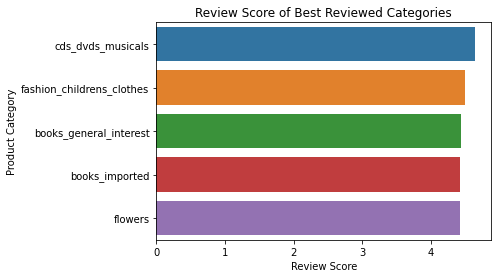

In [80]:
sns.barplot(
    x = 'review_score',
    y = 'product_category_name_english',
    data = best_rev
)
plt.xlabel('Review Score')
plt.ylabel('Product Category')
plt.title('Review Score of Best Reviewed Categories')
plt.show()

Kategori produk yang mendapat rata-rata review tertinggi
1. Musik
2. Pakaian anak-anak
3. Buku
4. Buku impor
5. Bunga

Score review dari barang-barang yang mendapat review terbaik relatif sama.

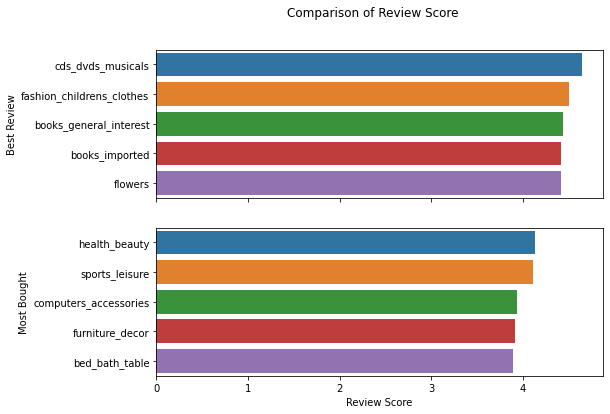

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

sns.barplot(
    y = 'product_category_name_english', 
    x = 'review_score',
    data = best_rev,
    # hue = 'product_category_name_english', 
    ax=axs[0]
    )
axs[0].set_ylabel('Best Review')
axs[0].set_xlabel('')

sns.barplot(
    y = 'product_category_name_english', 
    x = 'review_score',
    data = most_bought,
    # hue = 'product_category_name_english',
    ax=axs[1],
    # palette= 'pastel'
    )
axs[1].set_ylabel('Most Bought')
axs[1].set_xlabel('Review Score')
fig.suptitle('Comparison of Review Score')
plt.show()

Barang-barang kecantikan dan kesehatan, perlengkapan olahraga, aksesoris komputer, furnitur paling banyak dibeli tetapi nilai ulasannya tidak lebih baik dari barang-barang lain yang jarang dibeli seperti cd, pakaian anak-anak, buku, dan bunga.

### Hubungan antara review score dan durasi pengiriman

In [82]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [83]:
# kolom yang diperlukan untuk analisis korelasi durasi pengiriman dan review score
cols = ['order_id', 'product_category_name_english', 'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date']

In [84]:
df_date = df[cols]
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [85]:
date = list(df_date.iloc[:, 2])

In [86]:
# fungsi untuk parsing tanggal
def parse_date(date_fmt: str):
    '''Parse string to date
    Params:
        date_fmt <str>: date format that will be used within lambda function
    Return: lambda function that takes string as an argument
    '''
    from datetime import datetime as dt

    return lambda date: dt.strptime(date, date_fmt)

prsdate = parse_date('%Y-%m-%d %H:%M:%S')

In [87]:
df_date.isna().sum()

order_id                            0
product_category_name_english    1734
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
dtype: int64

Untuk mengubah data tanggal yang masih dalam format string, kita gunakan method apply. Namun perlu dipastikan terlebih dahulu agar setiap kolom tanggal yang akan kita gunakan tidak mengandung null values.

In [88]:
# drop row yang mengandung nilai null value
df_date = df_date.dropna(axis=0, how='any')

In [89]:
df_date.isna().sum()

order_id                         0
product_category_name_english    0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [90]:
def convcols_to_date(data, start_i, end_i, func):
    cols = data.columns[start_i : end_i]
    for col in cols:
        data[col] = data[col].apply(func)

    return data

In [91]:
df_date = convcols_to_date(df_date, 2, 5, prsdate)


In [92]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114060 entries, 0 to 118309
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114060 non-null  object        
 1   product_category_name_english  114060 non-null  object        
 2   order_delivered_carrier_date   114060 non-null  datetime64[ns]
 3   order_delivered_customer_date  114060 non-null  datetime64[ns]
 4   order_estimated_delivery_date  114060 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 5.2+ MB


In [93]:
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


Hitung selisih antara waktu dikirim dan terkirimnya barang ke pelanggan

In [94]:
def extract_days(data):
    '''extracting days from datetime object
    param:
        data <class datetime>
    return:
        days <int>
    '''
    return data.days

In [95]:
df_date['delivery_duration'] = (df_date.iloc[:, 3] - df_date.iloc[:, 2]).apply(extract_days)

In [96]:
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13


Hitung juga waktu yang perkiraan barang untuk sampai ke pelanggan

In [97]:
df_date['delivery_expectation'] = (df_date.iloc[:, 4] - df_date.iloc[:, 2]).apply(extract_days)

In [98]:
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_expectation
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,9
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8,10
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6,19
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4,9
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13,28


In [99]:
# gap waktu yang diperlukan barang untuk sampai ke pelanggan (kenyataan-perkiraan)
df_date['exp_fact'] = df_date['delivery_expectation'] - df_date['delivery_duration']
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_expectation,exp_fact
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,9,8
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8,10,2
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6,19,13
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4,9,5
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13,28,15


In [100]:
df_date = df_date.merge(df[['order_id','review_score']], how='left', left_on='order_id', right_on='order_id')
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_expectation,exp_fact,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,9,8,5.0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8,10,2,4.0
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6,19,13,5.0
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4,9,5,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13,28,15,5.0


In [101]:
df_date.isna().sum()*100/len(df_date)

order_id                         0.000000
product_category_name_english    0.000000
order_delivered_carrier_date     0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
delivery_duration                0.000000
delivery_expectation             0.000000
exp_fact                         0.000000
review_score                     0.969261
dtype: float64

Data review score tidak lengkap oleh karena itu kita perlu mengimputasi data yang missing tersebut

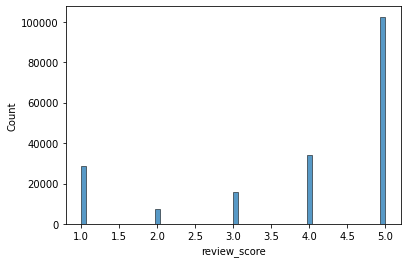

In [106]:
# melihat bagaimana persebaran nilai review
sns.histplot(data = df_date, x = 'review_score')
plt.show()

In [103]:
from sklearn.impute import SimpleImputer as imputer

In [109]:
si = imputer()
df_date['review_score'] = si.fit_transform(df_date[['review_score']])

In [110]:
df_date.isna().sum()

order_id                         0
product_category_name_english    0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_duration                0
delivery_expectation             0
exp_fact                         0
review_score                     0
dtype: int64

In [113]:
df_date.head()

,order_id,product_category_name_english,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_expectation,exp_fact,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,9,8,5.0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8,10,2,4.0
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6,19,13,5.0
3,00024acbcdf0a6daa1e931b038114c75,perfumery,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4,9,5,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13,28,15,5.0


In [125]:
df_date_categorized = df_date.copy()

In [126]:
df_date_categorized['category'] = df_date_categorized['review_score'].apply(lambda x: 'good' if x >= 4.0 else 'poor')

In [128]:
df_date_categorized['category'].value_counts()

good    136563
poor     53685
Name: category, dtype: int64

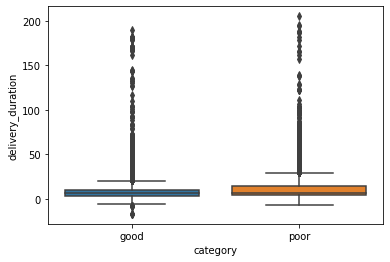

In [131]:
sns.boxplot(
    data = df_date_categorized,
    x = 'category',
    y = 'delivery_duration'
)
plt.show()

Dalam sekilas, tidak diamati perbedaan yang signifikan perbedaan delivery duration antara barang yang mendapat review baik atau buruk. Kemungkinan bagus/buruk review konsumen lebih bergantung pada kualitas barang yang diterima.